In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [10]:
fn=['Outlook', 'Temperature', 'Humidity', 'Wind']
cn=['No', 'Yes']
X = df[fn]
y = df[['Play Tennis']]

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

ValueError: could not convert string to float: 'Sunny'

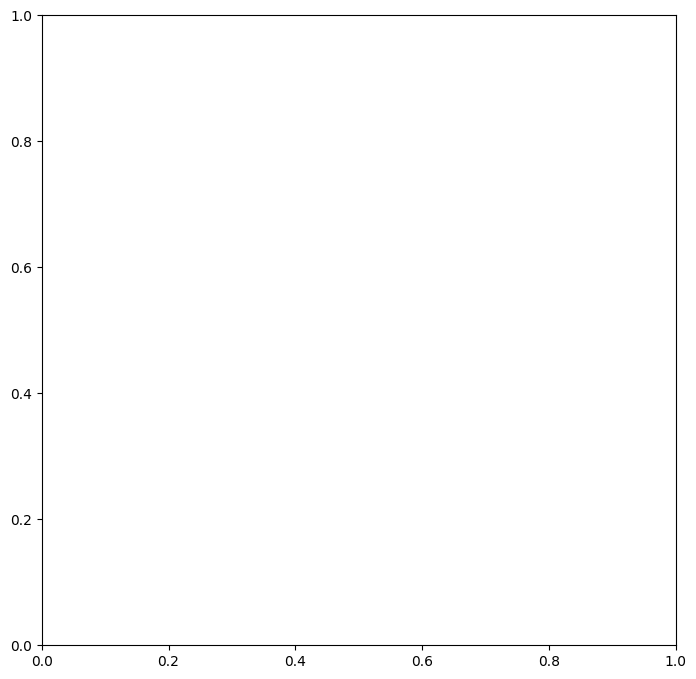

In [13]:
depth = [1, 2, 3, 4]
pic = 1
plt.figure(figsize=(18,18))

for dep in depth:
    ax = plt.subplot(2, 2, pic)
    clf = DecisionTreeClassifier(max_depth = dep,  criterion = 'gini', random_state = 12345)
    clf.fit(X, y)
    clf_pred = clf.predict(X)
    clf_acc = accuracy_score(y, clf_pred)
    plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
    ax.set_title("Accuracy %.3f" % ( clf_acc), fontsize=20)
    pic+=1

plt.subplots_adjust(wspace=0.1, hspace=0.4)    
    

In [ ]:
clf = DecisionTreeClassifier(random_state = 12345)
clf.fit(X, y)
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_trees = 8
height = 2
clf = RandomForestClassifier(n_estimators=max_trees, max_depth = height, random_state = 333)
clf.fit(X, np.ravel(y))
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))

In [ ]:
plt.figure(figsize=(18,8))
for pic in range(1,8):
    ax = plt.subplot(3, 3, pic)
    plot_tree(clf.estimators_[pic], feature_names = fn, class_names=cn, filled = True);
plt.subplots_adjust(wspace=0.1, hspace=0.4) 